In [12]:
import pandas as pd
data = pd.read_csv("data/earthquake-database.csv")
print("look at the Date column first.")
print(data.Date.sample(10))
print(f"the datetype of Date column is {data.Date.dtype}")

look at the Date column first.
14796    04/17/2000
7167     09/05/1984
8235     10/28/1986
15623    11/23/2001
18598    08/20/2007
21575    01/31/2013
17084    12/26/2004
5436     02/12/1980
6947     03/11/1984
4580     11/24/1977
Name: Date, dtype: object
the datetype of Date column is object


# parse date column

In [13]:
data["parse_date"] = pd.to_datetime(data.Date, format="%m/%d/%Y");

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

Notice that an error is raised since the format is not the same in `Date` column. As a workaround, we can tell pandas to figure out the possible formats by itself:

In [21]:
data["parse_date"] = pd.to_datetime(data.Date, format="%m/%d/%Y", infer_datetime_format=True);
print("parsed date look like")
print(data.parse_date.sample(10))
print(f"the datetype of parsed date is {data.parse_date.dtype}")

parsed date look like
10133   1990-08-20
11202   1992-11-12
5780    1981-01-30
22004   2013-12-21
7654    1985-08-13
5110    1979-03-20
20814   2011-06-05
21859   2013-08-17
18900   2008-03-06
13488   1997-04-15
Name: parse_date, dtype: datetime64[ns]
the datetype of parsed date is datetime64[ns]


# Show day and month distribution

In [16]:
day_of_month_earthquakes = data.parse_date.dt.day
print(day_of_month_earthquakes.sample(10))

1988     14
3845     20
6509     21
11233     7
17862     5
5477     26
4298      7
11967    13
18938     9
19931    27
Name: parse_date, dtype: int64


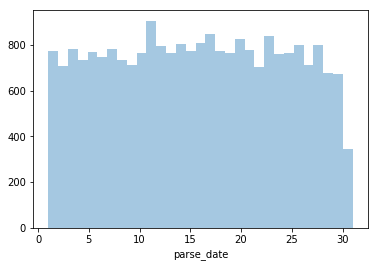

In [18]:
import seaborn as sns
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

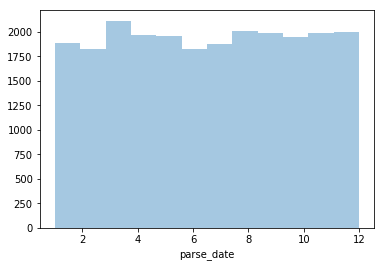

In [20]:
month_of_earthquakes = data.parse_date.dt.month
sns.distplot(month_of_earthquakes, kde=False, bins=12)